In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch,spectrogram

Text(0.5, 1.0, 'AR(2) process')

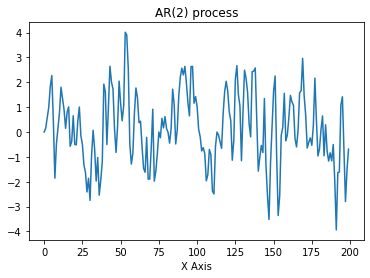

In [2]:
alpha = np.array([-0.6,.9])
k = len(alpha)
N = 200
x = np.zeros(N)
for i in range(k ,N):

  x[i] = sum(alpha*x[i-k:i]) +np.random.randn()

x+= np.sin(np.linspace(0,10*np.pi,N))
plt.plot(x)
plt.xlabel('X Axis')
plt.title('AR(%s) process'%k)

In [3]:
# define time vector
t = np.arange(N)/N
# initialize fourier coefficient
fc = np.zeros(N,dtype = complex)

# manual fourier
for f in range(N):
  #1) create complex sine wave
  csw = np.exp(-1j*2*np.pi*f*t)
  #2) dot product with signal
  fc[f] = np.dot(csw,x)

# FFT
fc2 = np.fft.fft(x)

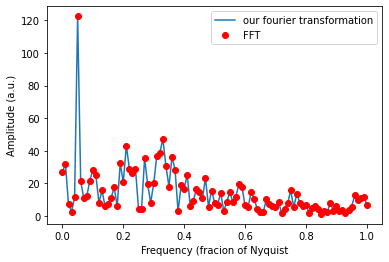

In [4]:
hz = np.linspace(0,1,int(N/2)+1)
plt.plot(hz,np.abs(fc[:len(hz)]),label = 'our fourier transformation')
plt.plot(hz,np.abs(fc2[:len(hz)]),'ro',label = 'FFT')
plt.xlabel('Frequency (fracion of Nyquist')
plt.ylabel('Amplitude (a.u.)')
plt.legend()

In [5]:
alpha = np.array([-0.6,.9])
k = len(alpha)
N = 21
x = np.zeros(N)
for i in range(k ,N):

  x[i] = sum(alpha*x[i-k:i]) +np.random.randn()




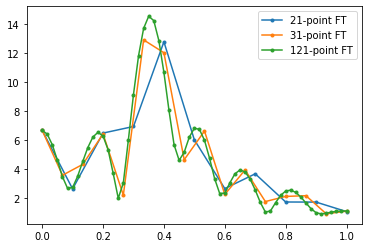

In [6]:
for i in range(3):
  # specifiy number of FFT points includieng zero padding

  nfft = N + 10**i * int(i!=0)

  #compute fft
  xX = np.fft.fft(x,n=nfft)

  #compute hz vector
  hz = np.linspace(0,1,int(nfft/2)+1)

  # plot amplitude spectrum
  plt.plot(hz,np.abs(xX[:len(hz)]),'.-',label = '%s-point FT'%nfft)

plt.legend()
plt.show()

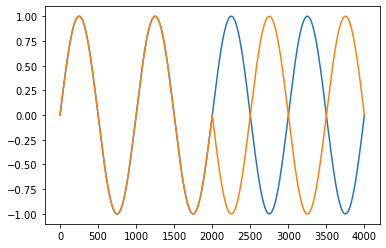

In [7]:


N = 2000
t = np.linspace(0,4*np.pi,N)

signal1 = np.concatenate((np.sin(t),np.sin(t)))
signal2 = np.concatenate((np.sin(t),-np.sin(t)))

plt.plot(signal1)
plt.plot(signal2)

(0.0, 0.01)

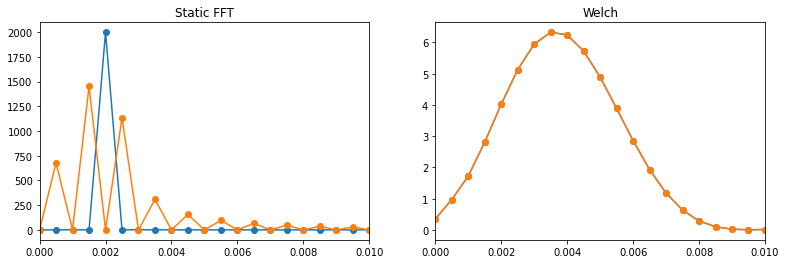

In [8]:
# static FFT
staticX1 = np.fft.fft(signal1)
staticX2 = np.fft.fft(signal2)
staticHz = np.linspace(0,1,int(len(signal1)/2+1))

# Welch

dynamicHz, dynamicX1 = welch(signal1,nfft=N)
dynamicHz, dynamicX2 = welch(signal1,nfft=N)

fig,ax = plt.subplots(1,2,figsize=(13,4))
ax[0].plot(staticHz,np.abs(staticX1[:len(staticHz)]),'-o',label = 'Signal1')
ax[0].plot(staticHz,np.abs(staticX2[:len(staticHz)]),'-o',label = 'Signal2')
ax[0].set_title('Static FFT')
ax[0].set_xlim([0,0.01])

ax[1].plot(dynamicHz,np.abs(dynamicX1[:len(staticHz)]),'-o',label = 'Signal1')
ax[1].plot(dynamicHz,np.abs(dynamicX2[:len(staticHz)]),'-o',label = 'Signal2')
ax[1].set_title('Welch')
ax[1].set_xlim([0,0.01])


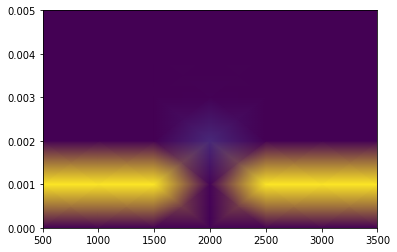

In [18]:
f,t,Sxx = spectrogram(signal2,noverlap=500,nperseg=1000)
plt.pcolormesh(t,f,Sxx,shading = 'gouraud')
plt.ylim([0,0.005])
plt.show()
